**TASK 7: Get Basic Sales Summary from a Tiny SQLite Database using Python**

**📁 Dataset:

Created a SQLite database sales_data.db with one table:
sales, containing fields like:

product, category, quantity, price, region, and sale_date

Random data (~150 rows) was inserted for testing purposes.**

**Key Tools Used:

Python with libraries: sqlite3, pandas, and matplotlib

SQLite: for storing and querying the sales data**

**Import libraries **

In [4]:
import sqlite3
import random
import pandas as pd

**Connect to SQLite Database**

In [51]:
# Connect to database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

**Create the SQLite database and sales table**

In [65]:
# Drop old table if it exists
cursor.execute("DROP TABLE IF EXISTS sales")
# Create a new, larger sales table
cursor.execute('''
CREATE TABLE sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    category TEXT,
    quantity INTEGER,
    price REAL,
    region TEXT,
    sale_date TEXT
)
''')

# Generate bigger sample data (100+ rows)
products = ['Laptop', 'Mouse', 'Keyboard', 'Monitor', 'USB Cable']
categories = ['Electronics', 'Accessories']
regions = ['North', 'South', 'East', 'West']
dates = pd.date_range(start="2024-01-01", periods=30).tolist()

# Insert random data
for _ in range(150):
    product = random.choice(products)
    category = 'Electronics' if product in ['Laptop', 'Monitor'] else 'Accessories'
    quantity = random.randint(1, 10)
    price = round(random.uniform(10, 500), 2)
    region = random.choice(regions)
    date = random.choice(dates).strftime("%Y-%m-%d")
    cursor.execute("INSERT INTO sales (product, category, quantity, price, region, sale_date) VALUES (?, ?, ?, ?, ?, ?)",
                   (product, category, quantity, price, region, date))

conn.commit()

In [66]:
print("sales table created with 150 records ✅")

sales table created with 150 records ✅


**Print the sales table**

In [68]:
# Use a query to fetch all columns from the 'sales' table
query = "SELECT * FROM sales"

# Run the query and load the results into a DataFrame
df_sales = pd.read_sql_query(query, conn)

# Print the complete DataFrame with all columns
print(df_sales)

      id    product     category  quantity   price region   sale_date
0      1     Laptop  Electronics         5   27.17  North  2024-01-22
1      2     Laptop  Electronics         5  396.73  North  2024-01-18
2      3     Laptop  Electronics         6  326.34   East  2024-01-05
3      4     Laptop  Electronics         6  236.02  North  2024-01-19
4      5   Keyboard  Accessories        10  482.58  South  2024-01-25
..   ...        ...          ...       ...     ...    ...         ...
145  146  USB Cable  Accessories        10   46.20  South  2024-01-09
146  147     Laptop  Electronics         2  181.30   West  2024-01-01
147  148  USB Cable  Accessories         8  136.70   East  2024-01-15
148  149  USB Cable  Accessories         6  195.24  South  2024-01-02
149  150      Mouse  Accessories         3  320.86  South  2024-01-15

[150 rows x 7 columns]


**Save the dataframe to a csv file**

In [61]:
# Save the DataFrame to a CSV file
df_sales.to_csv('sales_data.csv', index=False)

In [62]:
from IPython.display import FileLink

# Provide a clickable download link for the saved CSV file
FileLink('sales_data.csv')

/content/sales_data.csv

**Print the 1st 5 rows **

In [14]:
df_sales.head()  # Shows first 5 rows

,id,product,category,quantity,price,region,sale_date
0,1,Laptop,Electronics,5,134.66,North,2024-01-16
1,2,Monitor,Electronics,9,50.55,North,2024-01-27
2,3,Laptop,Electronics,3,250.12,North,2024-01-03
3,4,Laptop,Electronics,8,373.28,North,2024-01-30
4,5,Mouse,Accessories,10,194.29,North,2024-01-07


In [15]:
print("Total rows in table:", len(df_sales))

Total rows in table: 150


** Print the Total quantity and revenue per product**

In [16]:
# Query: Total quantity and revenue per product
query = '''
SELECT
    product,
    SUM(quantity) AS total_qty,
    ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY product
'''

df_product_summary = pd.read_sql_query(query, conn)
print(df_product_summary)

     product  total_qty   revenue
0   Keyboard        188  44968.80
1     Laptop        129  29191.84
2    Monitor        201  57728.98
3      Mouse        144  33381.43
4  USB Cable        173  53342.25


**# Query: Total quantity and revenue per product**

     product  total_qty   revenue
0   Keyboard        141  37212.19
1     Laptop        173  47570.19
2    Monitor        166  40066.80
3      Mouse        179  39929.31
4  USB Cable        175  44730.48


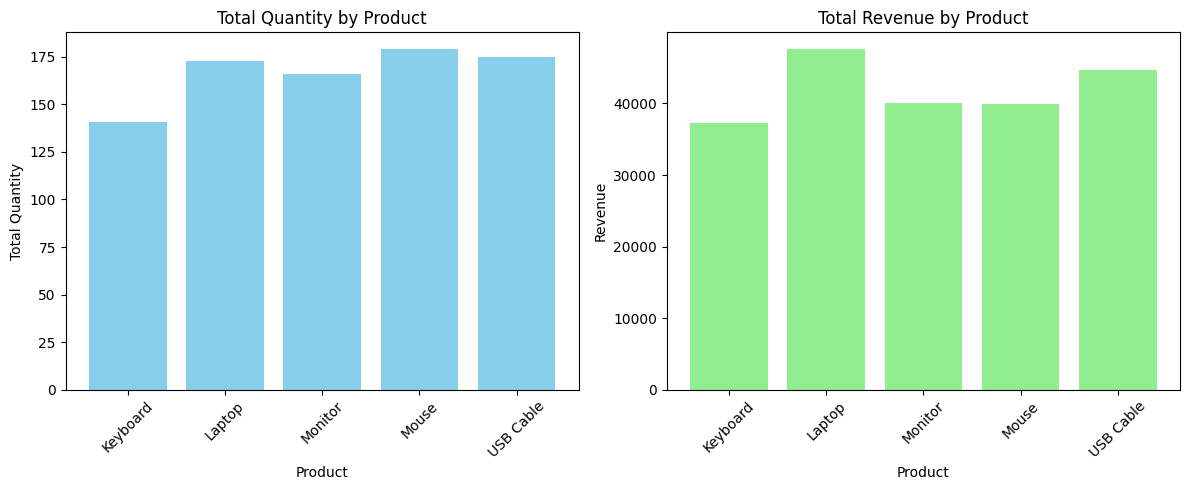

In [54]:
# Query: Total quantity and revenue per product
query = '''
SELECT
    product,
    SUM(quantity) AS total_qty,
    ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY product
'''

# Load result into DataFrame
df_product_summary = pd.read_sql_query(query, conn)
print(df_product_summary)

# Plotting side-by-side bar charts
plt.figure(figsize=(12, 5))

# Bar chart for quantity
plt.subplot(1, 2, 1)
plt.bar(df_product_summary['product'], df_product_summary['total_qty'], color='skyblue')
plt.title('Total Quantity by Product')
plt.xlabel('Product')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45)

# Bar chart for revenue
plt.subplot(1, 2, 2)
plt.bar(df_product_summary['product'], df_product_summary['revenue'], color='lightgreen')
plt.title('Total Revenue by Product')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("product_quantity_revenue_chart.png")
plt.show()


**📈 STEP 3: Visualization of sales table **

**Product-wise Revenue**

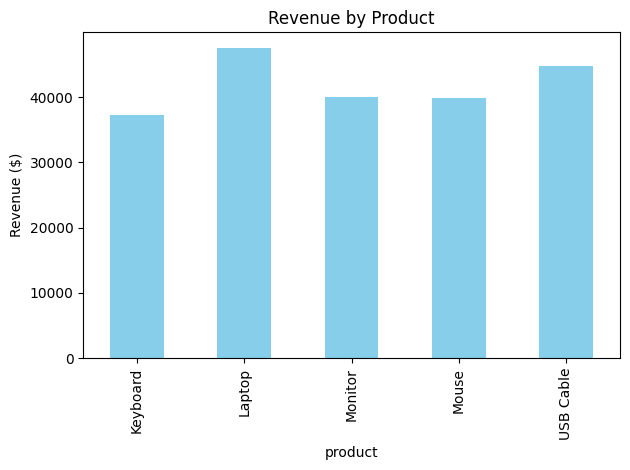

In [55]:
import matplotlib.pyplot as plt

# Bar chart of revenue per product
df_product_summary.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.ylabel("Revenue ($)")
plt.tight_layout()
plt.show()

**Regional Revenue Distribution (Pie Chart)**

  region   revenue
0   East  46195.93
1  North  54629.29
2  South  50158.58
3   West  58525.17


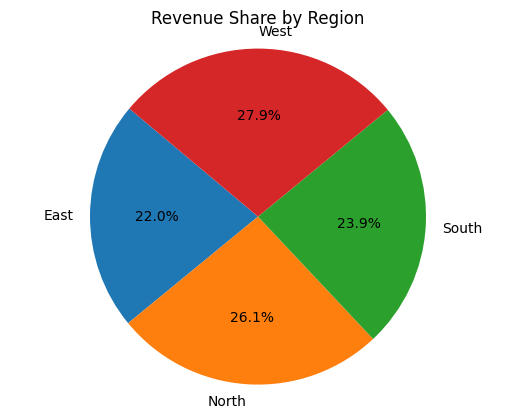

In [56]:
# Query: Revenue by region
query_region = '''
SELECT
    region,
    ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY region
'''

df_region = pd.read_sql_query(query_region, conn)
print(df_region)

# Pie chart
plt.pie(df_region['revenue'], labels=df_region['region'], autopct='%1.1f%%', startangle=140)
plt.title("Revenue Share by Region")
plt.axis('equal')
plt.show()

**Revenue by Product and Region**

In [57]:
query_adv = '''
SELECT
    product,
    region,
    ROUND(SUM(quantity * price), 2) AS revenue
FROM sales
GROUP BY product, region
ORDER BY revenue DESC
'''

df_adv = pd.read_sql_query(query_adv, conn)
print(df_adv.head(10))  # Top 10

     product region   revenue
0    Monitor  North  18241.53
1   Keyboard   West  15972.34
2     Laptop  South  14950.07
3      Mouse   West  14423.90
4  USB Cable  South  13969.23
5     Laptop   East  13807.32
6  USB Cable  North  12343.73
7  USB Cable   West  10808.75
8      Mouse  South  10646.95
9     Laptop   West  10352.18


**# Plot top 10 as bar chart**

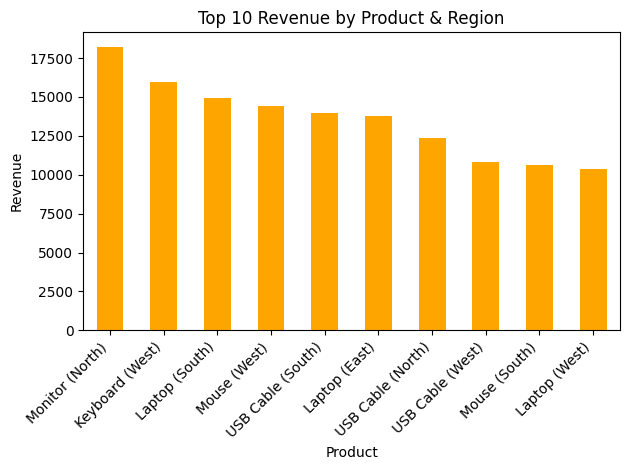

In [58]:
# Plot top 10 as bar chart
top10 = df_adv.head(10)
top10.plot(kind='bar', x='product', y='revenue', legend=False, color='orange')
plt.title("Top 10 Revenue by Product & Region")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(ticks=range(10), labels=[f"{row['product']} ({row['region']})" for _, row in top10.iterrows()], rotation=45, ha='right')
plt.tight_layout()

# Save chart
plt.savefig("top10_sales_chart.png")
plt.show()

**Monthly Trends (if dates were monthly)**

     month  total_revenue
0  2024-01      209508.97


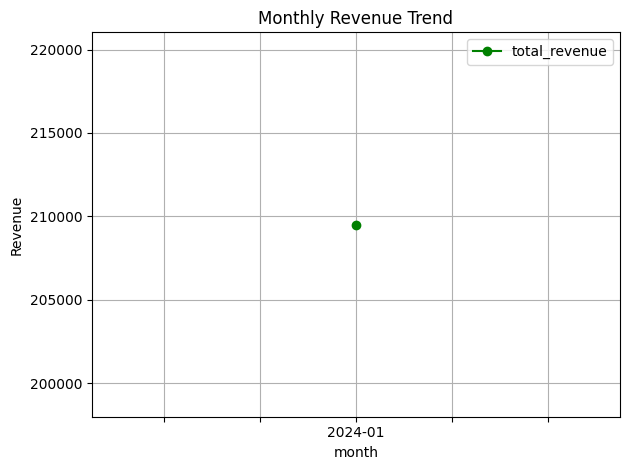

In [59]:
query_monthly = '''
SELECT
    strftime('%Y-%m', sale_date) AS month,
    ROUND(SUM(quantity * price), 2) AS total_revenue
FROM sales
GROUP BY month
ORDER BY month
'''

df_month = pd.read_sql_query(query_monthly, conn)
print(df_month)

# Line chart
df_month.plot(kind='line', x='month', y='total_revenue', marker='o', color='green')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

**total quantity by product**

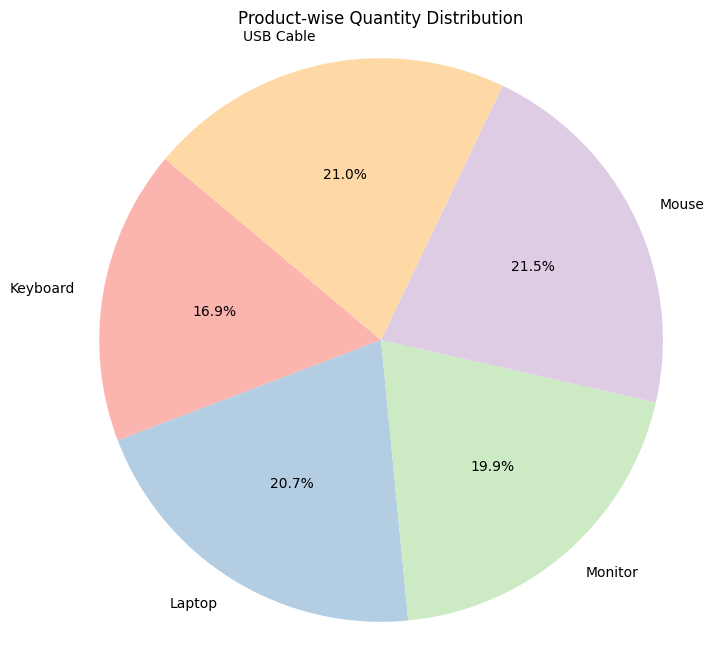

In [60]:
# SQL to get total quantity by product
query_pie = '''
SELECT
    product,
    SUM(quantity) AS total_quantity
FROM sales
GROUP BY product
'''

# Load data into pandas
df_pie = pd.read_sql_query(query_pie, conn)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    df_pie['total_quantity'],
    labels=df_pie['product'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title("Product-wise Quantity Distribution")
plt.axis('equal')  # Ensures the pie is a circle

# Save the pie chart
plt.savefig("product_quantity_pie_chart.png")

# Show the chart (optional)
plt.show()

**Conclusion:

In Task 7, the objective was to use SQL inside Python to pull simple sales data (like total quantity sold and revenue) from a SQLite database and visualize it using basic print statements and simple bar charts. This task provided practical experience with querying data, performing aggregations, and generating visual outputs to communicate insights.**

**📊 Outcome:

Learned how to integrate SQL queries inside Python

Performed basic aggregation using GROUP BY

Calculated total revenue using SQL expressions (SUM(quantity * price))

Visualized the results with bar and pie charts

Produced a script that can be reused for other datasets**